In [1]:
import matplotlib.pyplot as plt
import inanalysis_algo.algo_component as alc
from inanalysis_algo.utils import AlgoUtils
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def _pre_process(data, mode):
    data = np.array(data)
    if mode == 'PCA_3D':
        pca = PCA(n_components=3)
        data = pca.fit_transform(data)
    elif mode == 'PCA_2D':
        pca = PCA(n_components=2)
        data = pca.fit_transform(data)
    return data
def DBSCAN_model_preview(data, labels, x_axis_name='', y_axis_name='', mode=None):
    # pre-processing
    data = _pre_process(data, mode)
    # no. of clusters
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    fig = plt.figure(1, figsize=(8, 6))
    if mode == 'PCA_3D':
        # 3D fig object
        ax = Axes3D(fig, elev=-150, azim=110)
        # scatter clusters
        scatters = [ax.scatter(data[labels==i][:, 0], data[labels==i][:, 1], \
                               data[labels==i][:, 2], edgecolor='k', linewidth='1')\
                    for i in range(n_clusters)]
        # scatter outliers
        ax.scatter(data[labels==-1][:, 0], data[labels==-1][:, 1], data[labels==-1][:, 2], c='k')
    else:
        # scatter clusters
        scatters = [plt.scatter(data[labels==i][:, 0], data[labels==i][:, 1], edgecolor='k', linewidth='1') \
                    for i in range(n_clusters)]
        # scatter outliers
        plt.scatter(data[labels==-1][:, 0], data[labels==-1][:, 1], c='k')
    # legends and xy label
    legends = ['Group '+str(i+1) for i in range(n_clusters)]+['Outlier']
    plt.title('Iris model plot - mode = ' + str(mode))
    plt.legend(legends)
    if mode is None:
        plt.xlabel(x_axis_name)
        plt.ylabel(y_axis_name)
        # save the fig.
        plt.savefig(x_axis_name+' _ '+y_axis_name+'.png')
    else:
        plt.savefig(mode+'.png', dpi=80)
    plt.show()
    plt.close('all')

# eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff.

DEBUG:inanalysis_algo.utils:Clustering DBSCAN Training


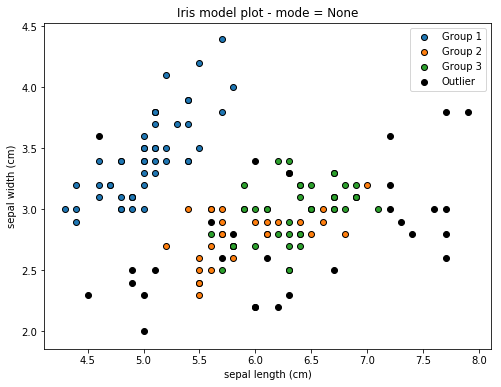

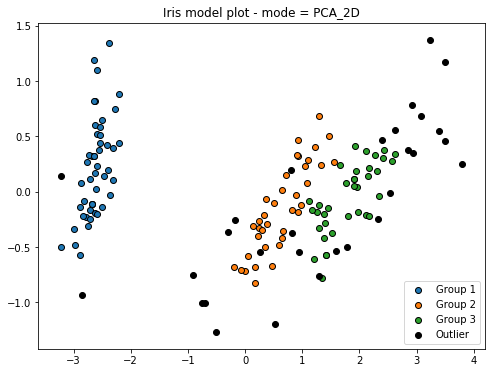

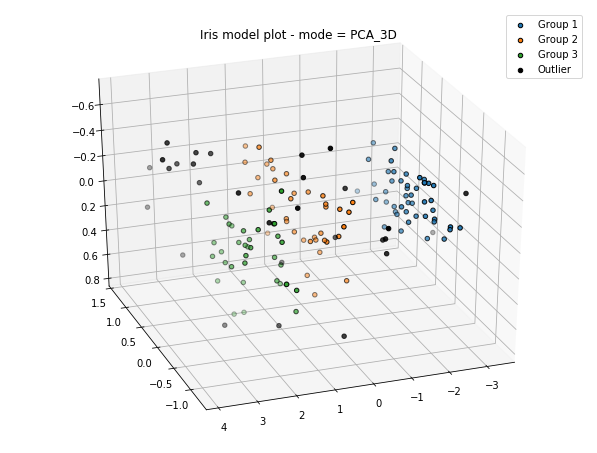

In [3]:
def main():
    arg_dict = {
        "eps": .42,
        "min_samples": 5
    }
    data = load_iris()
    iris_data = pd.DataFrame(data.data, columns=data.feature_names)
    
    algo_input = alc.AlgoParam(algo_control={'mode': 'training', 'control_params': arg_dict},
                               algo_data={'data': iris_data, 'label': None},
                               algo_model={'model_params': None, 'model_instance': None})
    in_algo = AlgoUtils.algo_factory('DBSCAN')
    algo_output = in_algo.do_algo(algo_input)
    model = algo_output.algo_model.model_instance
    # labels predicted by DBSCAN
    labels = model.labels_
    x_axis_name = data.feature_names[0]
    y_axis_name = data.feature_names[1]
    # normal plot
    DBSCAN_model_preview(iris_data, labels, x_axis_name=x_axis_name, y_axis_name=y_axis_name)
    # PCA - 2D plot
    DBSCAN_model_preview(iris_data, labels, mode='PCA_2D')
    # PCA - 3D plot
    DBSCAN_model_preview(iris_data, labels, mode='PCA_3D')

if __name__ == '__main__':
    main()